In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# 1. 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 2. 데이터 불러오기
df = pd.read_csv('../data/인구현황.csv', encoding='utf-8')

# 3. 데이터 전처리
#  콤마(,) 제거 및 숫자 변환 (안전 장치)
# '총인구수' 등 숫자 컬럼에 콤마가 있다면 제거, 없다면 그대로 둡니다.
for col in ['총인구수', '세대수', '남자 인구수', '여자 인구수']:
    if df[col].dtype == object: # 문자열인 경우만 처리
        df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce').fillna(0)

# (2) '전국' 제외
# 행정기관 이름에 '전국'이 포함된 행을 삭제합니다.
df_filtered = df[~df['행정기관'].str.contains('전국')].copy()

# (3) 인구수 내림차순 정렬 (그래프를 예쁘게 그리기 위해)
df_sorted = df_filtered.sort_values(by='총인구수', ascending=False)


데이터 준비 완료! ('전국' 제외 및 정렬 완료)


In [90]:
data = pd.read_csv('../data/data_draw_korea.csv')
print(data.shape)
print(type(data))

(229, 8)
<class 'pandas.core.frame.DataFrame'>


In [100]:
# 1. '전국'이 포함된 행 제외하기 (가장 중요!)
# 행정기관 이름에 '전국'이 들어간 줄을 찾아서 삭제합니다.

# 2. '총인구수' 컬럼 찾기 (자동)
total_pop_col = [c for c in df.columns if '총인구수' in c][0]

# 3. 내림차순 정렬 -> 상위 5개 추출 -> [행정기관, 총인구수] 컬럼만 선택
top5_pop = df_filtered.sort_values(by=total_pop_col, ascending=False).head(5)[['행정기관', total_pop_col]]

print(f"=== 1. 지역별 총인구수 Top 5 (전국 제외) ===")
display(top5_pop)

=== 1. 지역별 총인구수 Top 5 (전국 제외) ===


,행정기관,총인구수
9,경기도,13694685
1,서울특별시,9331828
2,부산광역시,3266598
16,경상남도,3228380
4,인천광역시,3021010


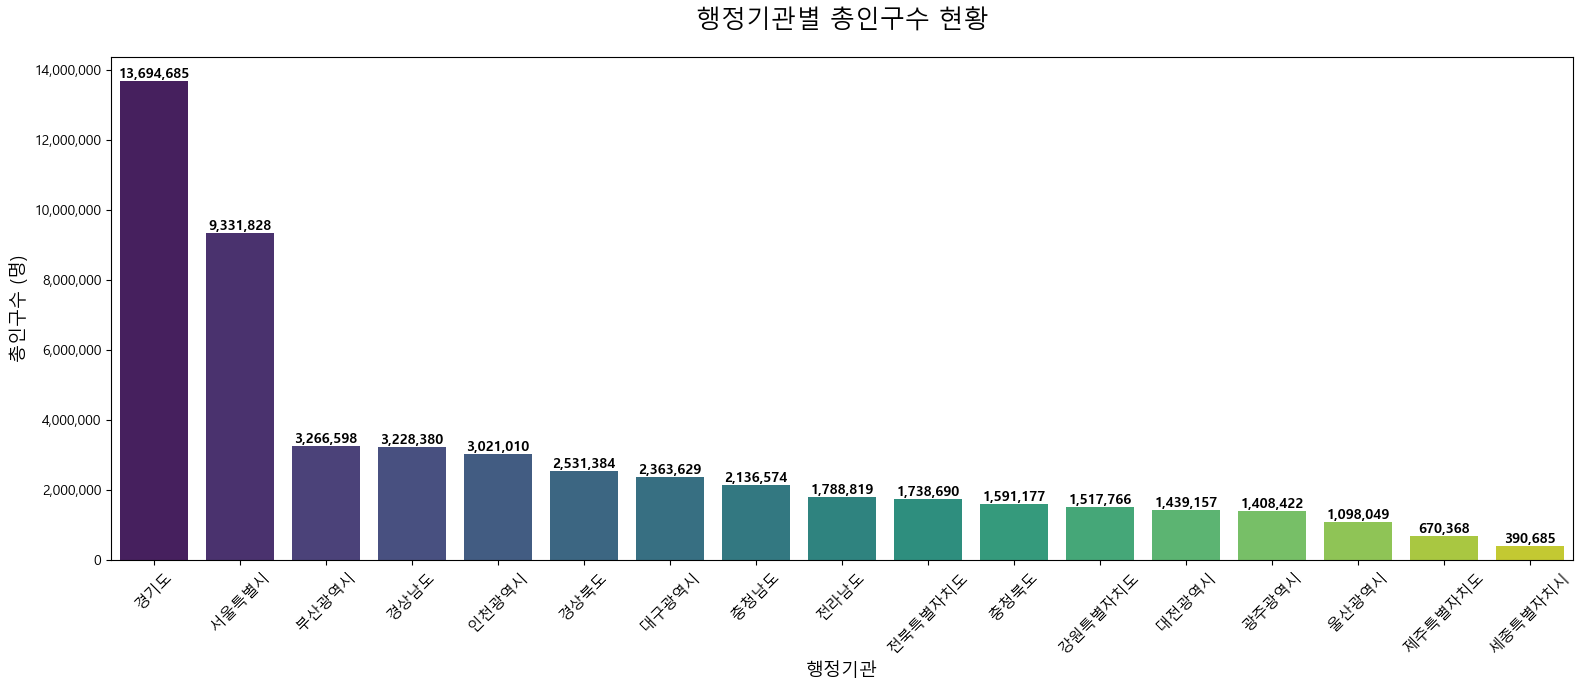

In [93]:
# 1. Figure와 Axes 객체 생성
# 데이터가 많으므로(17개 시도) 가로 사이즈를 16으로 넉넉하게 잡습니다.
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(16, 7)

# 2. Seaborn Barplot 그리기
# x='행정기관', y='총인구수' 로 변경
sns.barplot(data=df_sorted, x='행정기관', y='총인구수', ax=ax1, palette='viridis', hue='행정기관', legend=False)

# 3. 타이틀 및 축 라벨 설정
ax1.set_title('행정기관별 총인구수 현황', fontsize=18, pad=20)
ax1.set_xlabel('행정기관', fontsize=13)
ax1.set_ylabel('총인구수 (명)', fontsize=13)

# 4. Y축 포맷 설정 (천 단위 콤마)
ax1.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# 5. X축 라벨 회전 (지역 이름이 겹치지 않게 45도 기울임)
ax1.tick_params(axis='x', rotation=45, labelsize=11)

# 6. 막대 위에 수치 텍스트 표시
# df_sorted 데이터를 순서대로 가져와서 찍어줍니다.
for i, v in enumerate(df_sorted['총인구수']):
    ax1.text(i, v, "{:,}".format(int(v)), 
             fontsize=10, 
             color='black', 
             horizontalalignment='center', 
             verticalalignment='bottom', 
             fontweight='bold')

plt.tight_layout() # 여백 자동 조정
plt.show()

In [ ]:
#  '세대당 인구' 컬럼 이름 찾기
household_col = [c for c in df.columns if '세대당 인구' in c][0]

# 내림차순 정렬 -> 상위 5개 -> [행정기관, 세대당 인구] 선택
top5_household = df_filtered.sort_values(by=household_col, ascending=False).head(5)[['행정기관', household_col]]

# [핵심 코드] 인덱스를 0부터 다시 매기기 
top5_household = top5_household.reset_index(drop=True)


print(f"=== 2. {household_col} 높은 지역 Top 5 ===")
display(top5_household)

=== 2. 세대당 인구 높은 지역 Top 5 ===


,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14


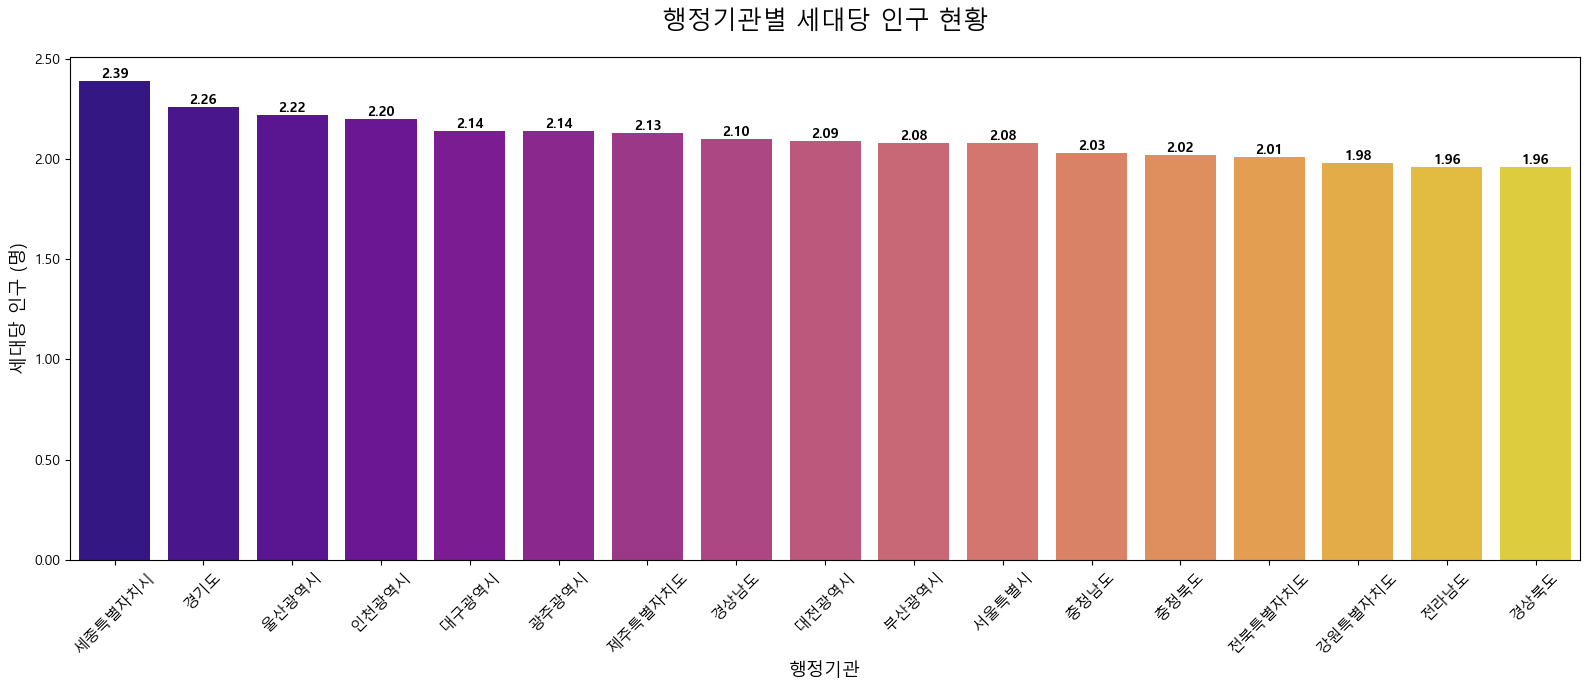

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# [0] 데이터 준비: '세대당 인구' 기준으로 내림차순 정렬 
# '세대당 인구' 컬럼 찾기
household_col = [c for c in df.columns if '세대당 인구' in c][0]

# '전국'이 제외된 df_filtered를 사용하여 정렬
df_household_sorted = df_filtered.sort_values(by=household_col, ascending=False)


# [1] Figure와 Axes 객체 생성
# 지역이 많으므로 가로 사이즈를 16으로 넉넉하게 잡습니다.
figure, ax2 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(16, 7)

# [2] Seaborn Barplot 그리기

sns.barplot(data=df_household_sorted, x='행정기관', y=household_col, ax=ax2, palette='plasma', hue='행정기관', legend=False)

# [3] 타이틀 및 축 라벨 설정
ax2.set_title(f'행정기관별 {household_col} 현황', fontsize=18, pad=20)
ax2.set_xlabel('행정기관', fontsize=13)
ax2.set_ylabel('세대당 인구 (명)', fontsize=13)

# [4] Y축 포맷 설정 (소수점 2자리 표시)
# 정수가 아니므로 콤마 대신 %.2f 사용
ax2.get_yaxis().set_major_formatter(ticker.FormatStrFormatter('%.2f'))

# [5] X축 라벨 회전 (지역 이름 겹침 방지)
ax2.tick_params(axis='x', rotation=45, labelsize=11)

# 막대 위에 수치 텍스트 표시
# df_household_sorted 데이터를 순서대로 가져와서 찍어줍니다.
for i, v in enumerate(df_household_sorted[household_col]):
    ax2.text(i, v, "{:.2f}".format(v),  # 소수점 2자리 포맷팅
             fontsize=10, 
             color='black', 
             horizontalalignment='center', 
             verticalalignment='bottom', 
             fontweight='bold')

plt.tight_layout() # 여백 자동 조정
plt.show()

In [ ]:
#  '남여 비율' 컬럼 이름 찾기 (자동)
ratio_col = [c for c in df.columns if '남여' in c and '비율' in c][0]


# 내림차순 정렬 -> 전체 추출 -> [행정기관, 남여 비율] 선택
# .head(5)를 삭제하여 모든 지역을 가져옵니다.
df_ratio_all = df_filtered.sort_values(by=ratio_col, ascending=False)[['행정기관', ratio_col]]

# 인덱스 초기화 (0, 1, 2... 순서로 재부여)
# drop=True : 기존의 뒤죽박죽인 인덱스 번호를 버립니다.
df_ratio_all = df_ratio_all.reset_index(drop=True)

print(f"=== 3. 행정기관별 {ratio_col} 전체 현황 ===")
display(df_ratio_all)

=== 3. 행정기관별 남여 비율 전체 현황 ===


,행정기관,남여 비율
0,울산광역시,1.06
1,충청남도,1.05
2,충청북도,1.04
3,경상남도,1.02
4,경상북도,1.02
5,전라남도,1.02
6,경기도,1.01
7,강원특별자치도,1.01
8,제주특별자치도,1.00
9,인천광역시,1.00


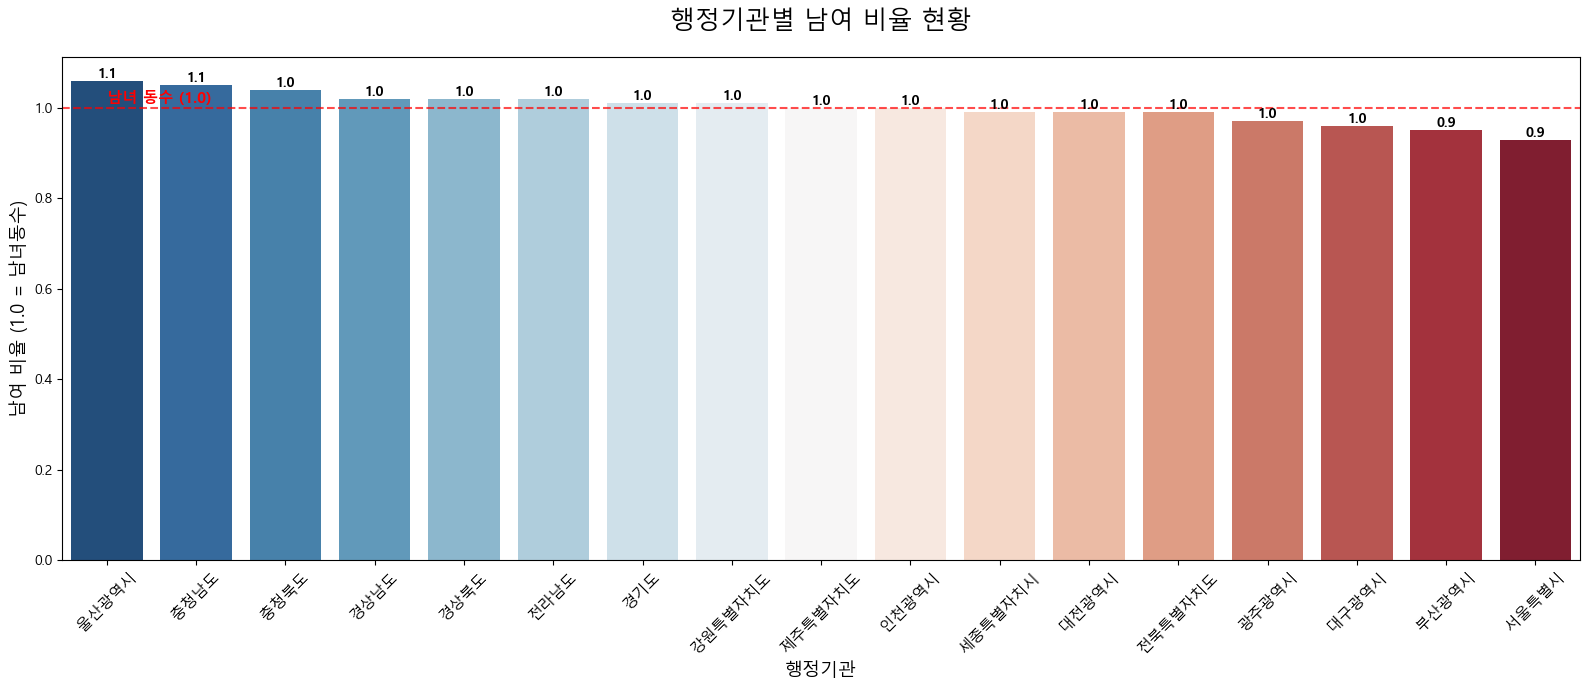

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker


# [1] Figure와 Axes 객체 생성
figure, ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(16, 7)

# [2] Seaborn Barplot 그리기
sns.barplot(data=df_ratio_sorted, x='행정기관', y=ratio_col, ax=ax3, palette='RdBu_r', hue='행정기관', legend=False)

# [3] 타이틀 및 축 라벨
ax3.set_title(f'행정기관별 {ratio_col} 현황', fontsize=18, pad=20)
ax3.set_xlabel('행정기관', fontsize=13)
ax3.set_ylabel('남여 비율 (1.0 = 남녀동수)', fontsize=13)

# [4] 기준선 추가 (남녀 동수 1.0 지점)
# 붉은 점선으로 1.0 위치를 표시하여 구분을 쉽게 합니다.
ax3.axhline(1.0, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
ax3.text(0, 1.01, '남녀 동수 (1.0)', color='red', fontsize=11, fontweight='bold')

# [5] Y축 포맷 설정
ax3.get_yaxis().set_major_formatter(ticker.FormatStrFormatter('%.1f'))

# [6] X축 라벨 회전
ax3.tick_params(axis='x', rotation=45, labelsize=11)

# [7] 막대 위에 수치 텍스트 표시
for i, v in enumerate(df_ratio_sorted[ratio_col]):
    ax3.text(i, v, "{:.1f}".format(v), 
             fontsize=10, 
             color='black', 
             horizontalalignment='center', 
             verticalalignment='bottom', 
             fontweight='bold')

plt.tight_layout()
plt.show()

In [119]:
import numpy as np


# 2. '남여 비율' 컬럼 자동 찾기
ratio_col = [c for c in df.columns if '남여' in c and '비율' in c][0]

# 3. [핵심] 분류 로직 함수 정의 (1.0 기준)
def get_gender_type(ratio):
    if ratio > 1.0:
        return "남초"
    elif ratio < 1.0:
        return "여초"
    else:
        return "동일"

# 4. 로직 적용하여 '남초여초' 컬럼 생성
df_filtered['남초여초'] = df_filtered[ratio_col].apply(get_gender_type)

# 5. [수정] 정렬하지 않고 원본 순서 그대로 필요한 컬럼만 선택
# sort_values() 함수를 뺐습니다.
df_result = df_filtered[['행정기관', ratio_col, '남초여초']]

# 6. 인덱스를 1부터 시작하도록 설정 (1, 2, 3...)
df_result.index = np.arange(1, len(df_result) + 1)

print(f"=== 4. 행정기관별 남초/여초 분석 (원본 데이터 순서) ===")
display(df_result)

=== 4. 행정기관별 남초/여초 분석 (원본 데이터 순서) ===


,행정기관,남여 비율,남초여초
1,서울특별시,0.93,여초
2,부산광역시,0.95,여초
3,대구광역시,0.96,여초
4,인천광역시,1.00,동일
5,광주광역시,0.97,여초
6,대전광역시,0.99,여초
7,울산광역시,1.06,남초
8,세종특별자치시,0.99,여초
9,경기도,1.01,남초
10,강원특별자치도,1.01,남초


In [125]:
# '세대당 인구' 컬럼 이름 찾기
household_col = [c for c in df.columns if '세대당 인구' in c][0]


#  평균(2.11)보다 높은 지역만 필터링
average_val = 2.11
df_higher = df_filtered[df_filtered[household_col] > average_val]

#  [핵심] 높은 순서대로 정렬 (내림차순)
df_result = df_higher.sort_values(by=household_col, ascending=False)

#  필요한 컬럼만 선택 [행정기관, 세대당 인구]
df_result = df_result[['행정기관', household_col]]

#  인덱스 0부터 시작하도록 리셋
# (기존 인덱스를 버리고 0, 1, 2... 순서로 새로 만듭니다)
df_result = df_result.reset_index(drop=True)

print(f"=== 5. 세대당 인구 평균({average_val}명) 초과 지역 (내림차순) ===")
display(df_result)

=== 5. 세대당 인구 평균(2.11명) 초과 지역 (내림차순) ===


,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14
5,광주광역시,2.14
6,제주특별자치도,2.13


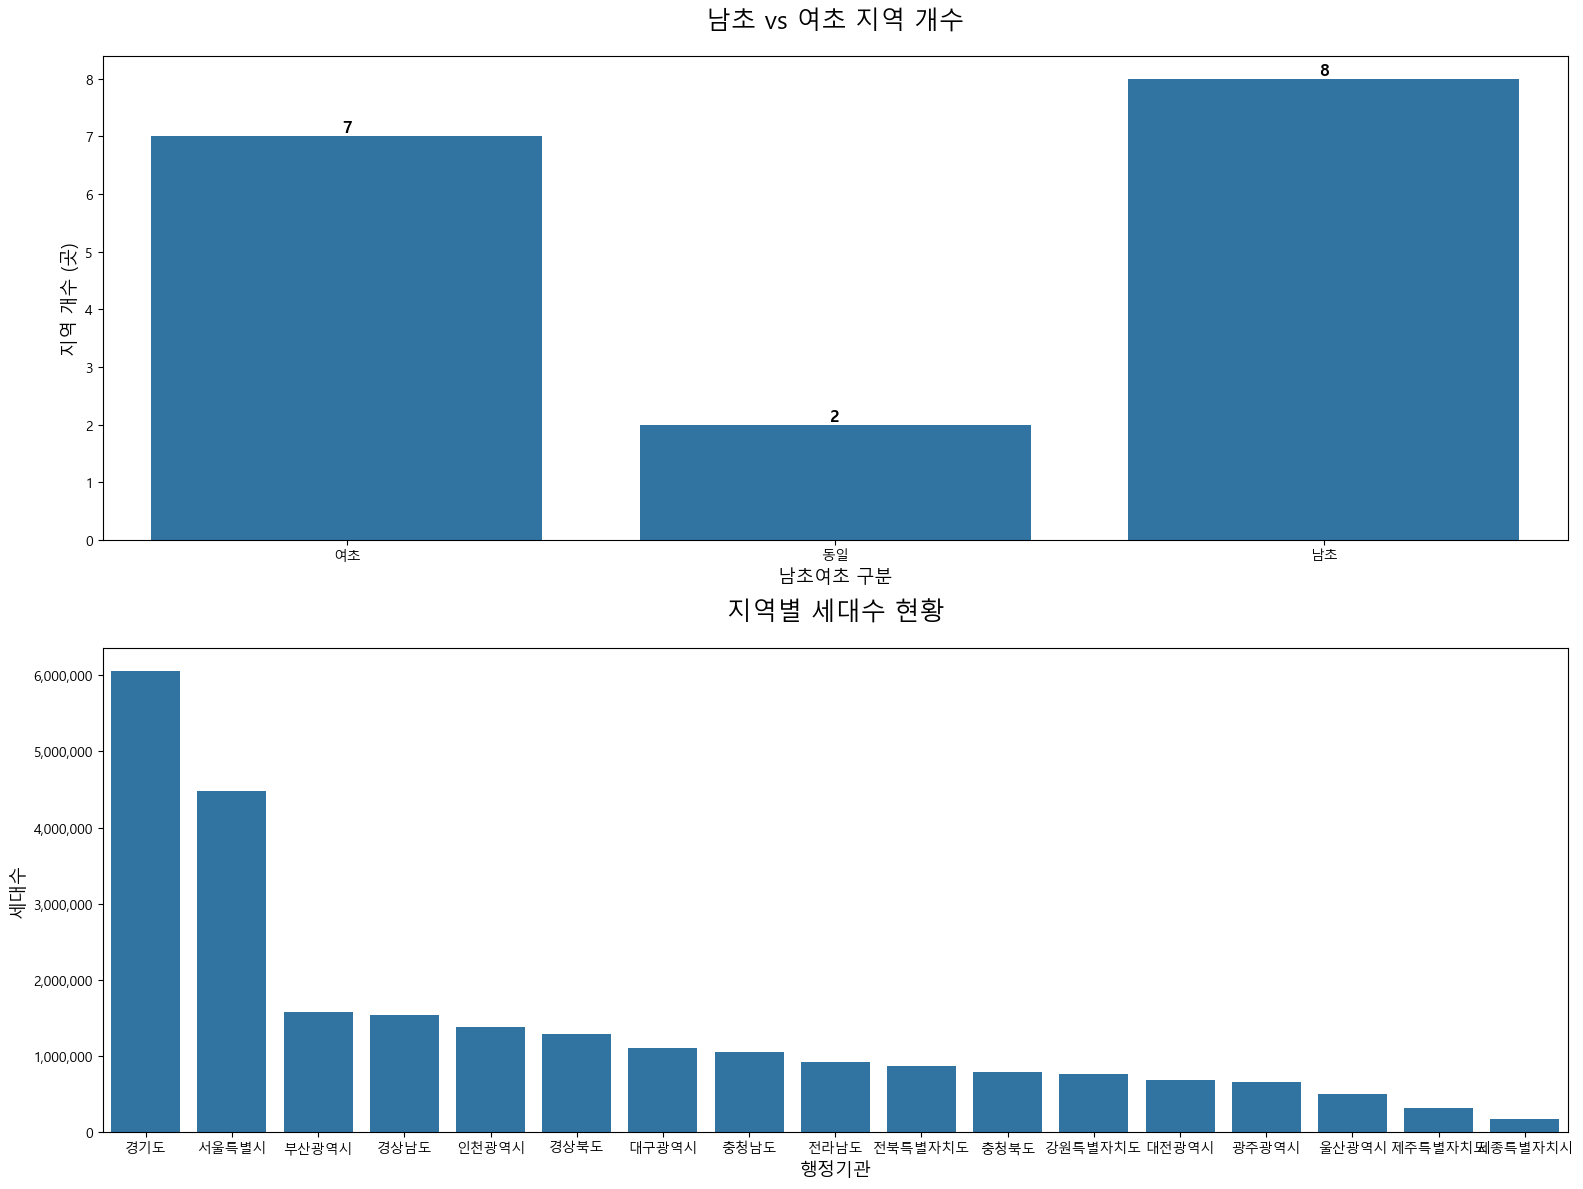

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker



# '남초여초' 컬럼 생성 
ratio_col = [c for c in df.columns if '남여' in c and '비율' in c][0]
def get_gender_type(ratio):
    if ratio > 1.0: return "남초"
    elif ratio < 1.0: return "여초"
    else: return "동일"
df_filtered['남초여초'] = df_filtered[ratio_col].apply(get_gender_type)

# 3. '세대수' 컬럼 찾기 및 내림차순 정렬 
# 컬럼명에 '세대수'가 포함된 것을 찾습니다.
household_cnt_col = [c for c in df.columns if '세대수' in c][0]
df_house_sorted = df_filtered.sort_values(by=household_cnt_col, ascending=False)


# [1] Figure와 Axes 객체 생성 (2행 1열)
# 위아래로 그래프를 배치하기 위해 nrows=2로 설정합니다.
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))

# ==========================================
# 첫 번째 그래프: 남초 vs 여초 개수 (countplot)
# ==========================================
# order 파라미터로 출력 순서를 지정합니다 (여초 -> 동일 -> 남초 순)
sns.countplot(data=df_filtered, x='남초여초', ax=axes[0], order=['여초', '동일', '남초'])

axes[0].set_title('남초 vs 여초 지역 개수', fontsize=18, pad=20)
axes[0].set_xlabel('남초여초 구분', fontsize=13)
axes[0].set_ylabel('지역 개수 (곳)', fontsize=13)

# 막대 위에 개수 숫자 표시 (팁)
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=12, fontweight='bold')


# ==========================================
# 두 번째 그래프: 지역별 세대수 (barplot)
# ==========================================
sns.barplot(data=df_house_sorted, x='행정기관', y=household_cnt_col, ax=axes[1])

axes[1].set_title('지역별 세대수 현황', fontsize=18, pad=20)
axes[1].set_xlabel('행정기관', fontsize=13)
axes[1].set_ylabel('세대수', fontsize=13)

# X축 라벨 회전 (이름 겹침 방지)
axes[1].tick_params(axis='x', rotation=0, labelsize=10) # 지역이 많으면 rotation=45 권장

# Y축 포맷 설정 (과학적 표기법 대신 천 단위 콤마)
# 이미지와 똑같이 하려면 이 줄을 지우셔도 됩니다.
axes[1].get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


plt.tight_layout() # 그래프 간 간격 자동 조정
plt.show()

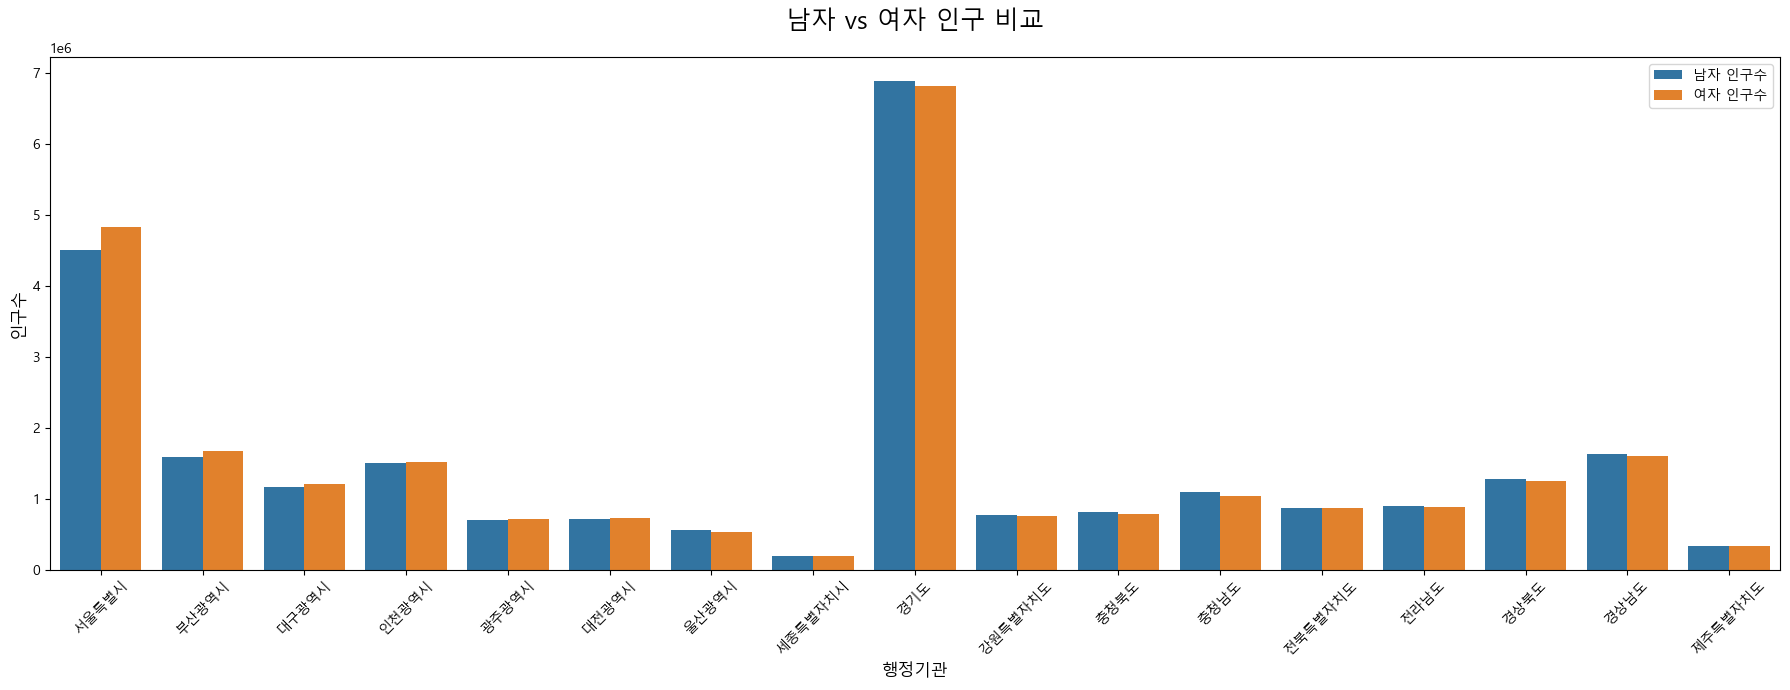

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker


# 2. [핵심] 데이터 구조 변경 (Wide -> Long)
# seaborn의 hue 옵션을 사용하기 위해 데이터를 녹입니다(melt).
# 변경 전: [행정기관, 남자 인구수, 여자 인구수]
# 변경 후: [행정기관, 성별(남자/여자), 인구수]
df_melted = pd.melt(df_filtered, 
                    id_vars=['행정기관'], 
                    value_vars=['남자 인구수', '여자 인구수'], 
                    var_name='성별', 
                    value_name='인구수')

# 3. 그래프 그리기
plt.figure(figsize=(18, 7))

# hue='성별' : 성별에 따라 막대를 색깔별로 나누어 나란히 그립니다.
# palette=['tab:blue', 'tab:orange'] : 이미지와 가장 유사한 파랑/주황 색상 지정
ax = sns.barplot(data=df_melted, x='행정기관', y='인구수', hue='성별', 
                 palette=['tab:blue', 'tab:orange'])

# 4. 디자인 설정
ax.set_title('남자 vs 여자 인구 비교', fontsize=18, pad=20)
ax.set_xlabel('행정기관', fontsize=12)
ax.set_ylabel('인구수', fontsize=12)

# X축 라벨 회전 (지역명이 겹치지 않게)
plt.xticks(rotation=45)


# 범례(Legend) 표시
plt.legend(title='') # 타이틀 없이 깔끔하게

plt.tight_layout()
plt.show()